# 자연어 처리를 통한 EDA, Data Analysis, Visualization

In [21]:
import pandas as pd
product_info = pd.read_csv('product_info.csv') #load data
product_info

,제품,제품특성
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...
1,B002-02376-00001,700mg x 28정
2,B002-03735-00001,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...
...,...,...
12773,B002-01994-00001,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용...
12774,B002-02600-00002,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함(수분공급) 세부제품...
12775,B002-02372-00095,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개
12776,B002-01318-00002,피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함(수분공급) 주요제품특징:풍부한 ...


In [22]:
train_data = pd.read_csv('train.csv')
train_data

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15886,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,3,0,2,4,1,1,3
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


## 문제정의: train 데이터의 대분류, 중분류, 소분류가 코드로 이루어져 데이터 분석이 직관적이지 않음. 이를 해결하기 위해서 product_info 데이터를 활용하여 카테고리를 예측해보려고함


## 목표: 제품특성 항목에 있는 자연어를 분석하여 대분류, 중분류, 소분류 항목을 예측
### 1. 결측치 처리

In [23]:
product_info.isnull().sum() #no null value

제품      0
제품특성    0
dtype: int64

### 2. Invalid data 처리
### 1) Too short data

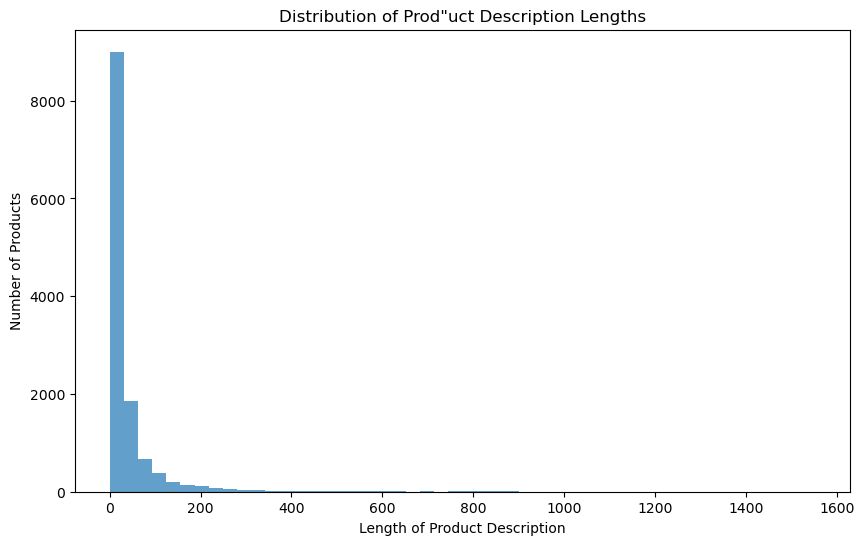

count    12778.000000
mean        43.824542
std         94.837469
min          1.000000
25%          8.000000
50%         17.000000
75%         38.000000
max       1550.000000
Name: desc_length, dtype: float64

In [24]:
# Calculate the length of each product description in terms of words
product_info['desc_length'] = product_info['제품특성'].apply(lambda x: len(x.split()))

import matplotlib.pyplot as plt

# Plot the distribution of description lengths
plt.figure(figsize=(10, 6))
plt.hist(product_info['desc_length'], bins=50, alpha=0.7)
plt.title('Distribution of Prod"uct Description Lengths')
plt.xlabel('Length of Product Description')
plt.ylabel('Number of Products')
plt.show()

# Display basic statistics of description lengths
product_info['desc_length'].describe()


In [25]:
# Calculate the Interquartile Range (IQR)
Q1 = product_info['desc_length'].quantile(0.25)
Q3 = product_info['desc_length'].quantile(0.75)
IQR = Q3 - Q1

# Define a factor to identify outliers; commonly used factor is 1.5
factor = 1.5

# Calculate the lower bound to identify too short descriptions
lower_bound = Q1 - (factor * IQR)

print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower Bound for Too Short Descriptions: {lower_bound}")

# Determine the number of descriptions considered too short based on this threshold
too_short_descriptions = product_info[product_info['desc_length'] < lower_bound]
num_too_short_descriptions = too_short_descriptions.shape[0]

print(f"Number of Descriptions Considered Too Short: {num_too_short_descriptions}")


Interquartile Range (IQR): 30.0
Lower Bound for Too Short Descriptions: -37.0
Number of Descriptions Considered Too Short: 0


### 너무 짧은 데이터는 충분한 정보를 주지 않기 때문에, invalid 데이터로 간주하려 했지만, IQR 방법에 의하면 음수의 길이를 제거해야 한다. 그러므로, 삭제하지 않기로 결정

### 그래도 데이터를 직접 확인하는 것이 좋다고 판단

In [26]:
short_feature_rows = product_info[product_info["제품특성"].apply(lambda x: len(x.split()) < 2)]

short_feature_rows

,제품,제품특성,desc_length
1431,B002-00908-00002,사용횟수:다회용,1
1433,B002-01001-00001,사용횟수:다회용,1
2107,B002-01989-00002,종류:치간칫솔(I자형),1
2149,B002-02246-00002,기능기능기능특징:충치예방,1
2486,B002-02272-00001,겹수롤수길이:2겹,1
2499,B002-01497-00001,겹수롤수길이:3겹,1
2528,B002-00303-00003,겹수롤수길이:2겹,1
2748,B002-01829-00005,매수정수과정:100매,1
2899,B002-01615-00001,제품타입사이즈:날개형,1
3173,B002-00649-00001,구성헤드종류부가기능:면도기,1


### 데이터를 살펴보면, 짧은 단어를 가지고 있는 데이터도 카테고리를 예측하는데 활용할 수 있을 것으로 예상

### 2) 같은 단어를 반복하는 데이터

In [27]:
#example
product_info.loc[9015]

제품                                     B002-01905-00072
제품특성           종류구성날수헤드종류부가기능부가기능부가기능부가기능부가기능부가기능:날교체용 
desc_length                                           1
Name: 9015, dtype: object

In [28]:
def detect_consecutive_repeated_words(text):
    """
    Detects consecutive repeating words in a given text and returns a count of such occurrences.
    """
    words = text.split()
    consecutive_repeats = 0
    for i in range(len(words) - 1):
        if words[i] == words[i + 1]:
            consecutive_repeats += 1
    
    return consecutive_repeats

# Apply the refined function to the '제품특성' column and find rows with consecutive repeated words
product_info['consecutive_repeats'] = product_info['제품특성'].apply(detect_consecutive_repeated_words)

# Filter rows with at least one occurrence of consecutive repeated words

repeated_consecutive_rows = product_info[product_info['consecutive_repeats'] > 0]
repeated_consecutive_rows[['제품','제품특성', 'consecutive_repeats']]

,제품,제품특성,consecutive_repeats
7,B002-01075-00001,"제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증):정, 생...",46
23,B002-01531-00010,주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):비타민B1 영양소 ...,5
99,B002-01848-00003,"제품타입섭취방법섭취대상섭취횟수1일 총 섭취량주요 기능성(식약처인증):캡슐, 주요 기...",8
100,B002-01848-00004,HCA1일 총 섭취량제품용량제품타입섭취횟수섭취방법섭취대상주요 기능성(식약처인증):1...,2
101,B002-01848-00006,제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)카테킨:정...,80
...,...,...,...
12653,B002-01438-00001,"구성:본품 형태:액상형 :1개, 구성형태:본품, 구성형태:본품, 구성형태:본품, 구...",6
12738,B002-00661-00003,"타입:플레인 평량:40gsm 매수:100매 정수과정:10단계정수 :20팩, 타입평량...",1
12744,B002-01856-00006,주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원...,7
12759,B002-01625-00002,"종류:치간칫솔(L자형), 종류:치간칫솔(L자형) 특징:교정용 특징:개별포장 재질:플...",1


### '정상 데이터'와 '비정상적으로 반복 문구 데이터'가 여전히 섞여서 걸러짐. 의미 없는 반복이 있는 데이터여도 키워드를 뽑아낼 수 있는 데이터들이기 때문에 일단 사용

### 3. 텍스트 분석
### 1) Text Cleaning

In [29]:
import re

# Define a new text cleaning function that retains Korean characters, digits, English characters, and the colon
def clean_text_keep_colon_digits_english(text):
    # Pattern to keep Korean text, digits, English letters and colon
    pattern = re.compile(r'[^가-힣0-9a-zA-Z:\s]')
    text = pattern.sub(' ', text)  # Replace characters not matching the pattern with a space
    text = ' '.join(text.split())  # Remove any extra spaces
    return text

# Re-applying the cleaning function to the correct column '제품특성' in the dataset
product_info['cleaned_제품특성'] = product_info['제품특성'].apply(clean_text_keep_colon_digits_english)

# Displaying the first few rows of the dataset to verify the cleaning
product_info[['제품특성', 'cleaned_제품특성']].head()


,제품특성,cleaned_제품특성
0,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...
1,700mg x 28정,700mg x 28정
2,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...
3,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...
4,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...,HCA:900mg 영양소 원료명 식약처고시 :비타민B1 영양소 원료명 식약처고시 :...


### 2) ':'를 기준으로 dictionary 생성

In [30]:
import re

def improved_parse_key_value_pairs(text):
    # Initialize an empty dictionary to hold the extracted key-value pairs
    extracted_pairs = {}
    
    # Find potential key-value pairs using a regular expression
    # The regex looks for patterns where a key is followed by ":", and a value is any non-greedy match until the next key or end of string
    pair_pattern = re.compile(r'([^:]+):([^:]+?)(?=\s+[^:]+:|$)')
    
    # Use the regex to find all matches in the text
    matches = pair_pattern.findall(text)
    
    # Process each match to populate the dictionary
    for match in matches:
        # Clean up the key and value by stripping whitespace
        key = match[0].strip()
        value = match[1].strip()
        # Handle cases where a comma might separate multiple values for a single key
        if ',' in value:
            value = value.split(',')  # Split the value into a list based on commas
            value = [v.strip() for v in value]  # Strip whitespace from each item
        extracted_pairs[key] = value
    
    return extracted_pairs

# Applying the improved function to your dataframe
product_info['parsed_제품특성'] = product_info['cleaned_제품특성'].apply(improved_parse_key_value_pairs)

# Display the results to verify correct parsing
product_info

,제품,제품특성,desc_length,consecutive_repeats,cleaned_제품특성,parsed_제품특성
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...,20,0,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...,"{'제품유형': '일반식품', '콜라겐 펩타이드': '1000mg', '종류': '..."
1,B002-02376-00001,700mg x 28정,3,0,700mg x 28정,{}
2,B002-03735-00001,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...,75,0,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...,"{'제품타입': '정', '섭취방법': '물과', '함께 섭취대상': '성인남녀',..."
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...,15,0,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...,"{'제품타입': '정', '섭취방법': '물과', '함께 섭취대상': '성인남녀',..."
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...,25,0,HCA:900mg 영양소 원료명 식약처고시 :비타민B1 영양소 원료명 식약처고시 :...,"{'HCA': '900mg', '영양소 원료명 식약처고시': '판토텐산', '1일 ..."
...,...,...,...,...,...,...
12773,B002-01994-00001,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용...,10,0,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용...,"{'형태': '액상형', '구성': '리필', '등급': '1종', '용도': '조..."
12774,B002-02600-00002,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함(수분공급) 세부제품...,8,0,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함 수분공급 세부제품특...,"{'헤어타입': '모든', '모발용 주요제품특징': '머릿결개선', '세부제품특징'..."
12775,B002-02372-00095,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개,5,0,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개,"{'사용대상': '여성용', '타입': '일자형', '20ml': '1팩 32개'}"
12776,B002-01318-00002,피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함(수분공급) 주요제품특징:풍부한 ...,25,0,피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함 수분공급 주요제품특징:풍부한 거...,"{'피부타입': '모든피부용', '향계열': '무향', '주요제품특징': '세정력'..."


### 3) Topic Modeling

In [32]:
# Combine the values of the parsed key-value pairs into a single string per product
product_info['combined_제품특성'] = product_info['parsed_제품특성'].apply(lambda x: ' '.join(x.values()))
product_info

,제품,제품특성,desc_length,consecutive_repeats,cleaned_제품특성,parsed_제품특성,combined_제품특성
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...,20,0,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...,"{'제품유형': '일반식품', '콜라겐 펩타이드': '1000mg', '종류': '...",일반식품 1000mg 어류 300Da 성인남녀 분말 3개월분 하루 1포 바로 1개 ...
1,B002-02376-00001,700mg x 28정,3,0,700mg x 28정,{},
2,B002-03735-00001,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...,75,0,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...,"{'제품타입': '정', '섭취방법': '물과', '함께 섭취대상': '성인남녀',...",정 물과 성인남녀 하루 1포 14일분 체지방 셀레늄 셀레늄 1개 1개 1개 건강기능...
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...,15,0,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...,"{'제품타입': '정', '섭취방법': '물과', '함께 섭취대상': '성인남녀',...",정 물과 성인남녀 하루 1정 1개 510mg x 60정
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...,25,0,HCA:900mg 영양소 원료명 식약처고시 :비타민B1 영양소 원료명 식약처고시 :...,"{'HCA': '900mg', '영양소 원료명 식약처고시': '판토텐산', '1일 ...",900mg 판토텐산 4정 28일분 정 하루 물과 성인남녀 체지방 1개 700mg x...
...,...,...,...,...,...,...,...
12773,B002-01994-00001,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용...,10,0,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용...,"{'형태': '액상형', '구성': '리필', '등급': '1종', '용도': '조...",액상형 리필 1종 조리기구 3개 500ml
12774,B002-02600-00002,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함(수분공급) 세부제품...,8,0,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함 수분공급 세부제품특...,"{'헤어타입': '모든', '모발용 주요제품특징': '머릿결개선', '세부제품특징'...",모든 머릿결개선 촉촉함 윤기부여 400ml 1개 400ml
12775,B002-02372-00095,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개,5,0,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개,"{'사용대상': '여성용', '타입': '일자형', '20ml': '1팩 32개'}",여성용 일자형 1팩 32개
12776,B002-01318-00002,피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함(수분공급) 주요제품특징:풍부한 ...,25,0,피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함 수분공급 주요제품특징:풍부한 거...,"{'피부타입': '모든피부용', '향계열': '무향', '주요제품특징': '세정력'...",모든피부용 무향 세정력 풍부한 각질케어 쿨링감 236ml 1개 236ml 뚜껑형 1...


In [34]:
from konlpy.tag import Okt
okt = Okt()

# Tokenize the combined product features, extracting only nouns
product_info['tokenized_제품특성'] = product_info['combined_제품특성'].apply(lambda x: ' '.join(okt.nouns(x)))
product_info

,제품,제품특성,desc_length,consecutive_repeats,cleaned_제품특성,parsed_제품특성,combined_제품특성,tokenized_제품특성
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...,20,0,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...,"{'제품유형': '일반식품', '콜라겐 펩타이드': '1000mg', '종류': '...",일반식품 1000mg 어류 300Da 성인남녀 분말 3개월분 하루 1포 바로 1개 ...,일반 식품 어류 성인 남녀 분말 개월 하루 포 바로 개 포
1,B002-02376-00001,700mg x 28정,3,0,700mg x 28정,{},,
2,B002-03735-00001,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...,75,0,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...,"{'제품타입': '정', '섭취방법': '물과', '함께 섭취대상': '성인남녀',...",정 물과 성인남녀 하루 1포 14일분 체지방 셀레늄 셀레늄 1개 1개 1개 건강기능...,정 물 성인 남녀 하루 포 체지방 셀레늄 셀레늄 개 개 개 건강 기능 식품 정
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...,15,0,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...,"{'제품타입': '정', '섭취방법': '물과', '함께 섭취대상': '성인남녀',...",정 물과 성인남녀 하루 1정 1개 510mg x 60정,정 물 성인 남녀 하루 정 개 정
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...,25,0,HCA:900mg 영양소 원료명 식약처고시 :비타민B1 영양소 원료명 식약처고시 :...,"{'HCA': '900mg', '영양소 원료명 식약처고시': '판토텐산', '1일 ...",900mg 판토텐산 4정 28일분 정 하루 물과 성인남녀 체지방 1개 700mg x...,판토텐산 정 정 하루 물 성인 남녀 체지방 개 정
...,...,...,...,...,...,...,...,...
12773,B002-01994-00001,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용...,10,0,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용...,"{'형태': '액상형', '구성': '리필', '등급': '1종', '용도': '조...",액상형 리필 1종 조리기구 3개 500ml,액 상형 리필 종 조리기구 개
12774,B002-02600-00002,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함(수분공급) 세부제품...,8,0,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함 수분공급 세부제품특...,"{'헤어타입': '모든', '모발용 주요제품특징': '머릿결개선', '세부제품특징'...",모든 머릿결개선 촉촉함 윤기부여 400ml 1개 400ml,모든 머릿결 개선 윤기 부여 개
12775,B002-02372-00095,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개,5,0,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개,"{'사용대상': '여성용', '타입': '일자형', '20ml': '1팩 32개'}",여성용 일자형 1팩 32개,성용 일자 팩 개
12776,B002-01318-00002,피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함(수분공급) 주요제품특징:풍부한 ...,25,0,피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함 수분공급 주요제품특징:풍부한 거...,"{'피부타입': '모든피부용', '향계열': '무향', '주요제품특징': '세정력'...",모든피부용 무향 세정력 풍부한 각질케어 쿨링감 236ml 1개 236ml 뚜껑형 1...,피부 용 무향 정력 각질 케어 쿨링감 개 뚜껑 개 뚜껑


In [35]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.95, min_df=2)
dtm = vectorizer.fit_transform(product_info['tokenized_제품특성'].tolist())


In [40]:
from sklearn.decomposition import LatentDirichletAllocation

# Number of topics
n_components = 5

lda = LatentDirichletAllocation(n_components=n_components, random_state=0)
lda.fit(dtm)

# Display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)


Topic 0:
남녀 성인 하루 바로 식품 건강 개월 분말 날개 기능
Topic 1:
피부 펌프 모든 영양 공급 샴푸 자극 윤기 부여 튜브
Topic 2:
일반 상형 단백질 리필 분리 유청 플라스틱 기타 동물성 칫솔
Topic 3:
캡슐 성인 하루 개월 남녀 비타민 보충 영양 건강 기타
Topic 4:
엠보싱 헤드 기본 구성 단계 계정수 충전 효과 보습 인증


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming 'tokenized_제품특성' is a series of strings where tokens are separated by space
texts = product_info['tokenized_제품특성'].fillna('')  # Ensure no NaN values

# Vectorization - this time using the pre-tokenized text
vectorizer = CountVectorizer(analyzer=lambda x: x.split())
doc_term_matrix = vectorizer.fit_transform(texts)

# LDA Model
lda = LatentDirichletAllocation(n_components=5, learning_method='online', random_state=0)
lda.fit(doc_term_matrix)

# Display Topics Function
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)


Topic 0:
헤드 칫솔 날개 기본 구성 용 세 모 각질 충전
Topic 1:
개 포 남녀 개월 바로 성인 하루 식품 유아 건강
Topic 2:
개 정 물 캡슐 성인 하루 남녀 개월 단백질 비타민
Topic 3:
팩 매 겹 엠보싱 롤 인증 계정수 캡 무 보습
Topic 4:
개 용 피부 품 일반 펌프 모든 영양 향 공급


In [47]:
# Define a function to remove single-character words
def remove_single_characters(text):
    # Split text into tokens, filter out single-character tokens, and rejoin
    return ' '.join([token for token in text.split() if len(token) > 1])

# Apply this function to each row in the 'tokenized_제품특성' column
product_info['tokenized_제품특성_cleaned'] = product_info['tokenized_제품특성'].apply(remove_single_characters)

# Display the cleaned tokenized text
product_info[['tokenized_제품특성', 'tokenized_제품특성_cleaned']].head()


,tokenized_제품특성,tokenized_제품특성_cleaned
0,일반 식품 어류 성인 남녀 분말 개월 하루 포 바로 개 포,일반 식품 어류 성인 남녀 분말 개월 하루 바로
1,,
2,정 물 성인 남녀 하루 포 체지방 셀레늄 셀레늄 개 개 개 건강 기능 식품 정,성인 남녀 하루 체지방 셀레늄 셀레늄 건강 기능 식품
3,정 물 성인 남녀 하루 정 개 정,성인 남녀 하루
4,판토텐산 정 정 하루 물 성인 남녀 체지방 개 정,판토텐산 하루 성인 남녀 체지방


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming 'tokenized_제품특성' is a series of strings where tokens are separated by space
texts = product_info['tokenized_제품특성_cleaned'].fillna('')  # Ensure no NaN values

# Vectorization - this time using the pre-tokenized text
vectorizer = CountVectorizer(analyzer=lambda x: x.split())
doc_term_matrix = vectorizer.fit_transform(texts)

# LDA Model
lda = LatentDirichletAllocation(n_components=5, learning_method='online', random_state=0)
lda.fit(doc_term_matrix)

# Display Topics Function
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)


Topic 0:
일반 단계 기타 헤드 칫솔 날개 기본 구성 플라스틱 제거
Topic 1:
캡슐 성인 하루 개월 남녀 비타민 개선 건강 분말 셀레늄
Topic 2:
하루 성인 유아 남녀 식품 바로 개월 건강 영양 보충
Topic 3:
피부 펌프 모든 영양 공급 샴푸 자극 일반 상형 윤기
Topic 4:
단백질 남녀 분리 공용 유청 성인 동물성 방지 오일 스푼


In [51]:
from collections import Counter

# Combine all tokenized text into a single list
all_tokens = ' '.join(product_info['tokenized_제품특성_cleaned']).split()

# Count the frequency of each word
word_freq = Counter(all_tokens)

# Get the most common words
most_common_words = word_freq.most_common()

# Display the most common words with their frequencies
for word, freq in most_common_words[:50]:  # Adjust the number as needed
    print(f'{word}: {freq}')


남녀: 3178
성인: 3090
하루: 2903
일반: 2381
개월: 2273
캡슐: 2228
영양: 1999
피부: 1986
펌프: 1807
모든: 1716
공급: 1314
샴푸: 1183
기타: 1074
자극: 1052
건강: 977
상형: 926
비타민: 868
바로: 860
단백질: 842
윤기: 823
부여: 783
유아: 782
튜브: 780
단계: 766
식품: 721
케어: 711
분말: 653
개선: 621
엠보싱: 617
모발: 606
흡수: 579
두피: 578
보충: 535
기능: 443
효과: 441
해당: 439
크림: 424
개입: 417
날개: 411
인증: 409
헤드: 407
세트: 404
머릿결: 400
리필: 399
기본: 399
칫솔: 398
분리: 397
구성: 395
파우치: 378
플라스틱: 369


In [54]:
merged_data = pd.merge(train_data, product_info, how='left', on='제품')
merged_data

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-04-03,2023-04-04,제품특성,desc_length,consecutive_repeats,cleaned_제품특성,parsed_제품특성,combined_제품특성,tokenized_제품특성,tokenized_제품특성_cleaned
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,헤어타입:모든 모발용 제품형태:스프레이형 주요제품특징:머릿결개선 주요제품특징:흡수력...,13.0,0.0,헤어타입:모든 모발용 제품형태:스프레이형 주요제품특징:머릿결개선 주요제품특징:흡수력...,"{'헤어타입': '모든', '모발용 제품형태': '스프레이형', '주요제품특징': ...",모든 스프레이형 흡수력 부드러운 윤기부여 영양공급 30ml 1개 50ml,모든 스프레이 흡수 윤기 부여 영양 공급 개,모든 스프레이 흡수 윤기 부여 영양 공급
1,1,B002-00002-00001,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,B002-00002-00002,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,B002-00002-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-00002,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,B002-00003-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,15885,B002-03799-00002,B002-C001-0003,B002-C002-0008,B002-C003-0042,B002-03799,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15886,15886,B002-03799-00003,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG508S3,5.0,0.0,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG508S3,"{'종류': '이유식보관용기', '특징': '전자레인지사용', '재질': '실리콘 ...",이유식보관용기 전자레인지사용 실리콘 3개세트 LLG508S3,이유식 보관 용기 전자레인지 사용 실리콘 개 세트,이유식 보관 용기 전자레인지 사용 실리콘 세트
15888,15888,B002-03799-00005,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,2,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG509S3,5.0,0.0,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG509S3,"{'종류': '이유식보관용기', '특징': '전자레인지사용', '재질': '실리콘 ...",이유식보관용기 전자레인지사용 실리콘 3개세트 LLG509S3,이유식 보관 용기 전자레인지 사용 실리콘 개 세트,이유식 보관 용기 전자레인지 사용 실리콘 세트


In [55]:
merged_data_nonan = merged_data.dropna(subset=["제품특성"])

In [56]:
print("Original DataFrame shape:", merged_data.shape)
print("New DataFrame without NaN in '제품특성':", merged_data_nonan.shape)

Original DataFrame shape: (15890, 473)
New DataFrame without NaN in '제품특성': (10481, 473)


In [57]:
merged_data_nonan

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-04-03,2023-04-04,제품특성,desc_length,consecutive_repeats,cleaned_제품특성,parsed_제품특성,combined_제품특성,tokenized_제품특성,tokenized_제품특성_cleaned
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,헤어타입:모든 모발용 제품형태:스프레이형 주요제품특징:머릿결개선 주요제품특징:흡수력...,13.0,0.0,헤어타입:모든 모발용 제품형태:스프레이형 주요제품특징:머릿결개선 주요제품특징:흡수력...,"{'헤어타입': '모든', '모발용 제품형태': '스프레이형', '주요제품특징': ...",모든 스프레이형 흡수력 부드러운 윤기부여 영양공급 30ml 1개 50ml,모든 스프레이 흡수 윤기 부여 영양 공급 개,모든 스프레이 흡수 윤기 부여 영양 공급
12,12,B002-00003-00009,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,생균:100억 CFU 1일 총 섭취량:1캡슐 제품용량:1개월분 제품타입:캡슐 섭취횟...,19.0,0.0,생균:100억 CFU 1일 총 섭취량:1캡슐 제품용량:1개월분 제품타입:캡슐 섭취횟...,"{'생균': '100억', 'CFU 1일 총 섭취량': '1캡슐', '제품용량': ...",100억 1캡슐 1개월분 캡슐 하루 물과 성인남녀 체지방 감소 480mg x 30캡슐,캡슐 개월 캡슐 하루 물 성인 남녀 체지방 감소 캡슐,캡슐 개월 캡슐 하루 성인 남녀 체지방 감소 캡슐
16,16,B002-00005-00001,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,0,0,피부타입:모든피부용 향계열:과일향 주요제품특징:향 주요제품특징:촉촉함(수분공급) 용...,8.0,0.0,피부타입:모든피부용 향계열:과일향 주요제품특징:향 주요제품특징:촉촉함 수분공급 용기...,"{'피부타입': '모든피부용', '향계열': '과일향', '주요제품특징': '촉촉함...",모든피부용 과일향 촉촉함 펌프형 500ml 1개 500ml,피부 용 과일 향 펌프 개,피부 과일 펌프
17,17,B002-00005-00002,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,0,0,향계열:과일향 주요제품특징:향 용기형태:펌프형 :1개 500ml,5.0,0.0,향계열:과일향 주요제품특징:향 용기형태:펌프형 :1개 500ml,"{'향계열': '과일향', '주요제품특징': '향', '펌프형': '1개 500ml'}",과일향 향 1개 500ml,과일 향 향 개,과일
19,19,B002-00005-00004,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,0,0,"형태:펌프형 용량:575ml :1개, 형태:펌프형 용량:520ml :1개, 형태:튜...",10.0,0.0,형태:펌프형 용량:575ml :1개 형태:펌프형 용량:520ml :1개 형태:튜브형...,"{'형태': '튜브형', '575ml': '1개', '520ml': '1개', '6...",튜브형 1개 1개 1개 575ml,튜브 개 개 개,튜브
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15877,15877,B002-03798-00049,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,0,1,재질:실리콘 재질:기타,2.0,0.0,재질:실리콘 재질:기타,{'재질': '기타'},기타,기타,기타
15882,15882,B002-03798-00054,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,1,0,형태:빨대형 용량:300ml 특징:양손잡이 특징:보온보냉 특징:샘방지/흘림방지 재질...,28.0,0.0,형태:빨대형 용량:300ml 특징:양손잡이 특징:보온보냉 특징:샘방지 흘림방지 재질...,"{'형태': '빨대형', '용량': '300ml', '특징': '양손잡이', '흘림...",빨대형 300ml 양손잡이 PE 스테인리스스틸,빨대 양손잡이 스테인리스 스틸,빨대 양손잡이 스테인리스 스틸
15883,15883,B002-03798-00055,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,2,0,형태:머그형 용량:240ml 특징:양손잡이 특징:미끄럼방지 특징:비스페놀A(BPA)...,21.0,0.0,형태:머그형 용량:240ml 특징:양손잡이 특징:미끄럼방지 특징:비스페놀A BPA ...,"{'형태': '머그형', '용량': '240ml', '특징': '미끄럼방지', 'B...",머그형 240ml 미끄럼방지 ABS 스테인리스스틸,머그 미끄럼 방지 스테인리스 스틸,머그 미끄럼 방지 스테인리스 스틸
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG508S3,5.0,0.0,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG508S3,"{'종류': '이유식보관용기', '특징': '전자레인지사용', '재질': '실리콘 ...",이유식보관용기 전자레인지사용 실리콘 3개세트 LLG508S3,이유식 보관 용기 전자레인지 사용 실리콘 개 세트,이유식 보관 용기 전자레인지 사용 실리콘 세트


In [66]:
merged_data_nonan.sort_values(by='대분류').head(50)

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-04-03,2023-04-04,제품특성,desc_length,consecutive_repeats,cleaned_제품특성,parsed_제품특성,combined_제품특성,tokenized_제품특성,tokenized_제품특성_cleaned
11376,11376,B002-02643-00001,B002-C001-0001,B002-C002-0001,B002-C003-0001,B002-02643,0,0,0,0,...,11,0,HCA:750mg 영양소 원료명(식약처고시):해당 없음 1일 총 섭취량:2포 제품용...,56.0,0.0,HCA:750mg 영양소 원료명 식약처고시 :해당 없음 1일 총 섭취량:2포 제품용...,"{'HCA': '750mg', '영양소 원료명 식약처고시': '비타민B1', '없음...",750mg 비타민B1 1포 15일분 분말 하루 물에 성인남녀 체지방 감소 3 5g ...,비타민 포 분말 하루 물 성인 남녀 체지방 감소 포 물 포,비타민 분말 하루 성인 남녀 체지방 감소
4955,4955,B002-01188-00009,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-01188,0,0,0,0,...,0,0,생균:20억 CFU 1일 총 섭취량:1캡슐 제품용량:1개월분 제품타입:캡슐 섭취횟수...,19.0,0.0,생균:20억 CFU 1일 총 섭취량:1캡슐 제품용량:1개월분 제품타입:캡슐 섭취횟수...,"{'생균': '20억', 'CFU 1일 총 섭취량': '1캡슐', '제품용량': '...",20억 1캡슐 1개월분 캡슐 하루 물과 성인여성 1개 180mg x 30캡슐,캡슐 개월 캡슐 하루 물 성인 여성 개 캡슐,캡슐 개월 캡슐 하루 성인 여성 캡슐
4954,4954,B002-01188-00008,B002-C001-0001,B002-C002-0001,B002-C003-0002,B002-01188,0,0,0,0,...,0,0,1일 총 섭취량:1캡슐 제품타입:캡슐 섭취횟수:하루 한 번 섭취방법:물과 함께 주요...,16.0,0.0,1일 총 섭취량:1캡슐 제품타입:캡슐 섭취횟수:하루 한 번 섭취방법:물과 함께 주요...,"{'1일 총 섭취량': '1캡슐', '제품타입': '캡슐', '섭취횟수': '하루'...",1캡슐 캡슐 하루 물과 영양보충 1개 1000IU 100캡슐,캡슐 캡슐 하루 물 영양 보충 개 캡슐,캡슐 캡슐 하루 영양 보충 캡슐
4953,4953,B002-01188-00007,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-01188,0,0,0,0,...,0,0,생균:10억 CFU 1일 총 섭취량:1포 제품용량:2개월분 제품타입:분말 섭취횟수:...,18.0,0.0,생균:10억 CFU 1일 총 섭취량:1포 제품용량:2개월분 제품타입:분말 섭취횟수:...,"{'생균': '10억', 'CFU 1일 총 섭취량': '1포', '제품용량': '2...",10억 1포 2개월분 분말 하루 물에 유아 장건강 1 9g x 60개입,포 개월 분말 하루 물 유아 장 건강 개입,개월 분말 하루 유아 건강 개입
4952,4952,B002-01188-00006,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-01188,0,0,0,0,...,0,0,아연:10mg 영양소 원료명(식약처고시):아연 섭취대상:유아/청소년 제품용량:1개월...,15.0,0.0,아연:10mg 영양소 원료명 식약처고시 :아연 섭취대상:유아 청소년 제품용량:1개월...,"{'아연': '10mg', '영양소 원료명 식약처고시': '아연', '섭취대상': ...",10mg 아연 유아 1개월분 액상 하루 물에 1개 120ml,아연 유아 개월 액 하루 물 개,아연 유아 개월 하루
4951,4951,B002-01188-00005,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-01188,0,0,0,0,...,0,0,생균:1억 CFU 제품용량:1개월분 제품타입:액상 섭취횟수:하루 한 번 섭취대상:유...,11.0,0.0,생균:1억 CFU 제품용량:1개월분 제품타입:액상 섭취횟수:하루 한 번 섭취대상:유...,"{'생균': '1억', 'CFU 제품용량': '1개월분', '제품타입': '액상',...",1억 1개월분 액상 하루 유아 장건강 8ml,개월 액 하루 유아 장 건강,개월 하루 유아 건강
7353,7353,B002-01804-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-01804,0,0,0,0,...,0,0,영양소 원료명(식약처고시)DHA+EPA제품타입섭취대상제품용량1일 총 섭취량섭취횟수섭...,259.0,0.0,영양소 원료명 식약처고시 DHA EPA제품타입섭취대상제품용량1일 총 섭취량섭취횟수섭...,{'영양소 원료명 식약처고시 DHA EPA제품타입섭취대상제품용량1일 총 섭취량섭취횟...,비타민E 혈행개선 혈행개선 비타민E 600mg 동물성 캡슐 성인남녀 6개월분 1캡슐...,비타민 혈행 개선 혈행 개선 비타민 동물성 캡슐 성인 남녀 개월 캡슐 하루 물 개 ...,비타민 혈행 개선 혈행 개선 비타민 동물성 캡슐 성인 남녀 개월 캡슐 하루 플러스 ...
7351,7351,B002-01802-00002,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-01802,0,0,0,0,...,0,0,제품타입:분말 섭취방법:바로 음용 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 ...,18.0,0.0,제품타입:분말 섭취방법:바로 음용 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 ...,"{'제품타입': '분말', '섭취방법': '바로', '음용 섭취대상': '성인남녀'...",분말 바로 성인남녀 하루 1포 1개월분 비타민C 3g x 30포,분말 바로 성인 남녀 하루 포 개월 비타민 포,분말 바로 성인 남녀 하루 개월 비타민
7350,7350,B002-01802-00001,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-01802,0,0,0,0,...,0,0,제품타입:분말 섭취방법:물에 섞어서 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총...,16.0,0.0,제품타입:분말 섭취방법:물에 섞어서 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총...,"{'제품타입': '분말', '섭취방법': '물에', '섞어서 섭취대상': '성인남녀...",분말 물에 성인남녀 하루 1포 1개월분 1개 3g x 30포,분말 물 성인 남녀 하루 포 개월 개 포,분말 성인 남녀 하루 개월
7349,7349,B002-01801-00001,B002-C001-0001,B002-C002-0001,B002-C003-0001,B002-01801,0,0,0,0,...,0,0,제품유형:일반식품 섭취대상:성인남녀 제품타입:분말 :1개 102g,5.0,0.0,제품유형:일반식품 섭취대상:성인남녀 제품타입:분말 :1개 102g,"{'제품유형': '일반식품', '섭취대상': '성인남녀', '분말': '1개 102g'}",일반식품 성인남녀 1개 102g,일반 식품 성인 남녀 개,일반 식품 성인 남녀


In [64]:
merged_data_nonan['대분류'].value_counts()

대분류
B002-C001-0002    7158
B002-C001-0001    2642
B002-C001-0005     448
B002-C001-0003     144
B002-C001-0004      89
Name: count, dtype: int64

In [62]:
merged_data_nonan[merged_data_nonan['대분류'] =='B002-C001-0001']

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-04-03,2023-04-04,제품특성,desc_length,consecutive_repeats,cleaned_제품특성,parsed_제품특성,combined_제품특성,tokenized_제품특성,tokenized_제품특성_cleaned
12,12,B002-00003-00009,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,생균:100억 CFU 1일 총 섭취량:1캡슐 제품용량:1개월분 제품타입:캡슐 섭취횟...,19.0,0.0,생균:100억 CFU 1일 총 섭취량:1캡슐 제품용량:1개월분 제품타입:캡슐 섭취횟...,"{'생균': '100억', 'CFU 1일 총 섭취량': '1캡슐', '제품용량': ...",100억 1캡슐 1개월분 캡슐 하루 물과 성인남녀 체지방 감소 480mg x 30캡슐,캡슐 개월 캡슐 하루 물 성인 남녀 체지방 감소 캡슐,캡슐 개월 캡슐 하루 성인 남녀 체지방 감소 캡슐
30,30,B002-00008-00001,B002-C001-0001,B002-C002-0001,B002-C003-0001,B002-00008,0,0,3,4,...,2,0,주요 기능성(식약처인증):장건강 영양소 원료명(식약처고시):식이섬유 제품타입:구미/...,19.0,0.0,주요 기능성 식약처인증 :장건강 영양소 원료명 식약처고시 :식이섬유 제품타입:구미 ...,"{'주요 기능성 식약처인증': '장건강', '영양소 원료명 식약처고시': '식이섬유...",장건강 식이섬유 구미 씹어서 성인남녀 하루 1포 14일분 1개 20g x 14포,장 건강 식이섬유 구미 성인 남녀 하루 포 개 포,건강 식이섬유 구미 성인 남녀 하루
31,31,B002-00009-00001,B002-C001-0001,B002-C002-0001,B002-C003-0004,B002-00009,0,0,0,0,...,0,0,단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리대두단백질...,18.0,0.0,단백질종류:동물성 식물성 단백질성분:농축유청단백질 WPC 단백질성분:분리대두단백질 ...,"{'단백질종류': '동물성', '식물성 단백질성분': '농축유청단백질', 'WPC ...",동물성 농축유청단백질 분리대두단백질 산양유단백질 26g 성인남녀 우유 물에 1스푼 ...,동물성 농축 유청 단백질 분리 단백질 산양 유 단백질 성인 남녀 우유 물 스푼 하루 개,동물성 농축 유청 단백질 분리 단백질 산양 단백질 성인 남녀 우유 스푼 하루
33,33,B002-00011-00001,B002-C001-0001,B002-C002-0001,B002-C003-0005,B002-00011,0,0,0,0,...,0,0,홍삼농축액 함량:2.5% 고형분 함량:60% 포장형태:스틱형 1일 총 섭취량:1포 ...,22.0,0.0,홍삼농축액 함량:2 5 고형분 함량:60 포장형태:스틱형 1일 총 섭취량:1포 제품...,"{'홍삼농축액 함량': '2', '5 고형분 함량': '60', '포장형태': '스...",2 60 스틱형 1포 1개월분 하루 바로 유아 농축액 1개 20ml x 10개입,스틱 포 개월 하루 바로 유아 농축액 개 개입,스틱 개월 하루 바로 유아 농축액 개입
37,37,B002-00015-00001,B002-C001-0001,B002-C002-0001,B002-C003-0005,B002-00015,0,0,0,0,...,0,0,홍삼농축액 함량:0% 고형분 함량:87% 1일 총 섭취량:1포 제품용량:개인별 다름...,83.0,0.0,홍삼농축액 함량:0 고형분 함량:87 1일 총 섭취량:1포 제품용량:개인별 다름 섭...,"{'홍삼농축액 함량': '0', '고형분 함량': '87', '1일 총 섭취량': ...",0 87 3스푼 80일분 하루 씹어서 1개 씹어서 하루 물에 성인남녀 농축액 건강기...,스푼 하루 개 하루 물 성인 남녀 농축액 건강 기능 식품 면역 해당 개 농축액 해당...,스푼 하루 하루 성인 남녀 농축액 건강 기능 식품 면역 해당 농축액 해당 개인
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15826,15826,B002-03796-00008,B002-C001-0001,B002-C002-0001,B002-C003-0004,B002-03796,0,0,0,0,...,1,2,주요 기능성(식약처인증):해당 없음 영양소 원료명(식약처고시):해당 없음 섭취대상:...,35.0,0.0,주요 기능성 식약처인증 :해당 없음 영양소 원료명 식약처고시 :해당 없음 섭취대상:...,"{'주요 기능성 식약처인증': '해당', '없음 영양소 원료명 식약처고시': '해당...",해당 해당 성인남녀 물에 2스푼 하루 1개 동물성 분리유청단백질 분리대두단백질 산양...,해당 해당 성인 남녀 물 스푼 하루 개 동물성 분리 유청 단백질 분리 단백질 산양 ...,해당 해당 성인 남녀 스푼 하루 동물성 분리 유청 단백질 분리 단백질 산양 단백질 ...
15827,15827,B002-03796-00009,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-03796,23,23,26,44,...,0,0,생균:10억 CFU 1일 총 섭취량:1포 제품용량:1개월분 제품타입:분말 섭취횟수:...,23.0,0.0,생균:10억 CFU 1일 총 섭취량:1포 제품용량:1개월분 제품타입:분말 섭취횟수:...,"{'생균': '10억', 'CFU 1일 총 섭취량': '1포', '제품용량': '1...",10억 1포 1개월분 분말 하루 바로 성인남녀 장건강 셀레늄 1개 2 5g x 30포,포 개월 분말 하루 바로 성인 남녀 장 건강 셀레늄 개 포,개월 분말 하루 바로 성인 남녀 건강 셀레늄
15828,15828,B002-03796-00010,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-03796,0,0,0,0,...,3,2,제품타입:분말 섭취방법:바로 음용 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 ...,16.0,0.0,제품타입:분말 섭취방법:바로 음용 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 ...,"{'제품타입': '분말', '섭취방법': '바로', '음용 섭취대상': '성인남녀'...",분말 바로 성인남녀 하루 1포 1개월분 1개 2 8g x 30포,분말 바로 성인 남녀 하루 포 개월 개 포,분말 바로 성인 남녀 하루 개월
15829,15829,B002-03796-00011,B002-C001-0001,B002-C002-0001,B002-C003-0001,B002-03796,0,0,0,0,...,0,0,제품유형:일반식품 종류:어류 분자량:600Da 섭취대상:성인남녀 제품타입:구미/젤리...,17.0,0.0,제품유형:일반식품 종류:어류 분자량:600Da 섭취대상:성인남녀 제품타입:구미 젤리...,"{'제품유형': '일반식품', '종류': '어류', '분자량': '600Da', '...",일반식품 어류 600Da 성인남녀 구미 14일분 하루 1포 2개 20g x 15포,일반 식품 어류 성인 남녀 구미 하루 포 개 포,일반 식품 어류 성인 남녀 구미 하루


In [67]:
merged = merged_data_nonan

In [76]:
merged

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-04-03,2023-04-04,제품특성,desc_length,consecutive_repeats,cleaned_제품특성,parsed_제품특성,combined_제품특성,tokenized_제품특성,tokenized_제품특성_cleaned
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,0,헤어타입:모든 모발용 제품형태:스프레이형 주요제품특징:머릿결개선 주요제품특징:흡수력...,13.0,0.0,헤어타입:모든 모발용 제품형태:스프레이형 주요제품특징:머릿결개선 주요제품특징:흡수력...,"{'헤어타입': '모든', '모발용 제품형태': '스프레이형', '주요제품특징': ...",모든 스프레이형 흡수력 부드러운 윤기부여 영양공급 30ml 1개 50ml,모든 스프레이 흡수 윤기 부여 영양 공급 개,모든 스프레이 흡수 윤기 부여 영양 공급
12,12,B002-00003-00009,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,0,생균:100억 CFU 1일 총 섭취량:1캡슐 제품용량:1개월분 제품타입:캡슐 섭취횟...,19.0,0.0,생균:100억 CFU 1일 총 섭취량:1캡슐 제품용량:1개월분 제품타입:캡슐 섭취횟...,"{'생균': '100억', 'CFU 1일 총 섭취량': '1캡슐', '제품용량': ...",100억 1캡슐 1개월분 캡슐 하루 물과 성인남녀 체지방 감소 480mg x 30캡슐,캡슐 개월 캡슐 하루 물 성인 남녀 체지방 감소 캡슐,캡슐 개월 캡슐 하루 성인 남녀 체지방 감소 캡슐
16,16,B002-00005-00001,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,0,0,피부타입:모든피부용 향계열:과일향 주요제품특징:향 주요제품특징:촉촉함(수분공급) 용...,8.0,0.0,피부타입:모든피부용 향계열:과일향 주요제품특징:향 주요제품특징:촉촉함 수분공급 용기...,"{'피부타입': '모든피부용', '향계열': '과일향', '주요제품특징': '촉촉함...",모든피부용 과일향 촉촉함 펌프형 500ml 1개 500ml,피부 용 과일 향 펌프 개,피부 과일 펌프
17,17,B002-00005-00002,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,0,0,향계열:과일향 주요제품특징:향 용기형태:펌프형 :1개 500ml,5.0,0.0,향계열:과일향 주요제품특징:향 용기형태:펌프형 :1개 500ml,"{'향계열': '과일향', '주요제품특징': '향', '펌프형': '1개 500ml'}",과일향 향 1개 500ml,과일 향 향 개,과일
19,19,B002-00005-00004,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,0,0,"형태:펌프형 용량:575ml :1개, 형태:펌프형 용량:520ml :1개, 형태:튜...",10.0,0.0,형태:펌프형 용량:575ml :1개 형태:펌프형 용량:520ml :1개 형태:튜브형...,"{'형태': '튜브형', '575ml': '1개', '520ml': '1개', '6...",튜브형 1개 1개 1개 575ml,튜브 개 개 개,튜브
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15877,15877,B002-03798-00049,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,0,1,재질:실리콘 재질:기타,2.0,0.0,재질:실리콘 재질:기타,{'재질': '기타'},기타,기타,기타
15882,15882,B002-03798-00054,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,1,0,형태:빨대형 용량:300ml 특징:양손잡이 특징:보온보냉 특징:샘방지/흘림방지 재질...,28.0,0.0,형태:빨대형 용량:300ml 특징:양손잡이 특징:보온보냉 특징:샘방지 흘림방지 재질...,"{'형태': '빨대형', '용량': '300ml', '특징': '양손잡이', '흘림...",빨대형 300ml 양손잡이 PE 스테인리스스틸,빨대 양손잡이 스테인리스 스틸,빨대 양손잡이 스테인리스 스틸
15883,15883,B002-03798-00055,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,2,0,형태:머그형 용량:240ml 특징:양손잡이 특징:미끄럼방지 특징:비스페놀A(BPA)...,21.0,0.0,형태:머그형 용량:240ml 특징:양손잡이 특징:미끄럼방지 특징:비스페놀A BPA ...,"{'형태': '머그형', '용량': '240ml', '특징': '미끄럼방지', 'B...",머그형 240ml 미끄럼방지 ABS 스테인리스스틸,머그 미끄럼 방지 스테인리스 스틸,머그 미끄럼 방지 스테인리스 스틸
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,0,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG508S3,5.0,0.0,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG508S3,"{'종류': '이유식보관용기', '특징': '전자레인지사용', '재질': '실리콘 ...",이유식보관용기 전자레인지사용 실리콘 3개세트 LLG508S3,이유식 보관 용기 전자레인지 사용 실리콘 개 세트,이유식 보관 용기 전자레인지 사용 실리콘 세트


In [70]:
filtered_data = merged[merged['대분류'] == 'B002-C001-0001']

In [74]:
# Convert the space-separated string to a list by splitting by spaces
filtered_data['tokenized_제품특성_cleaned'] = filtered_data['tokenized_제품특성_cleaned'].apply(lambda x: x.split() if isinstance(x, str) else [])

# Now sum up all the token lists into a single list
all_tokens = sum(filtered_data['tokenized_제품특성_cleaned'], [])

# Proceed with counting the tokens
from collections import Counter
token_counts = Counter(all_tokens)

# Identify the most common tokens
most_common_tokens = token_counts.most_common(20)  # adjust the number as needed

print(most_common_tokens)


[('성인', 2703), ('하루', 2547), ('남녀', 2497), ('캡슐', 1854), ('개월', 1747), ('건강', 810), ('단백질', 789), ('비타민', 745), ('바로', 722), ('분말', 545), ('식품', 535), ('영양', 470), ('보충', 468), ('분리', 372), ('해당', 369), ('유아', 350), ('유청', 339), ('동물성', 321), ('기능', 314), ('일반', 273)]


C:\Users\Karl\AppData\Local\Temp\ipykernel_29388\1486778846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['tokenized_제품특성_cleaned'] = filtered_data['tokenized_제품특성_cleaned'].apply(lambda x: x.split() if isinstance(x, str) else [])


In [77]:
merged['대분류:건강식품'] = merged['대분류'].apply(lambda x: 1 if x == 'B002-C001-0001' else 0)
merged

C:\Users\Karl\AppData\Local\Temp\ipykernel_29388\481800992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['대분류:건강식품'] = merged['대분류'].apply(lambda x: 1 if x == 'B002-C001-0001' else 0)


,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,2023-04-04,제품특성,desc_length,consecutive_repeats,cleaned_제품특성,parsed_제품특성,combined_제품특성,tokenized_제품특성,tokenized_제품특성_cleaned,대분류:건강식품
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0,헤어타입:모든 모발용 제품형태:스프레이형 주요제품특징:머릿결개선 주요제품특징:흡수력...,13.0,0.0,헤어타입:모든 모발용 제품형태:스프레이형 주요제품특징:머릿결개선 주요제품특징:흡수력...,"{'헤어타입': '모든', '모발용 제품형태': '스프레이형', '주요제품특징': ...",모든 스프레이형 흡수력 부드러운 윤기부여 영양공급 30ml 1개 50ml,모든 스프레이 흡수 윤기 부여 영양 공급 개,모든 스프레이 흡수 윤기 부여 영양 공급,0
12,12,B002-00003-00009,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0,생균:100억 CFU 1일 총 섭취량:1캡슐 제품용량:1개월분 제품타입:캡슐 섭취횟...,19.0,0.0,생균:100억 CFU 1일 총 섭취량:1캡슐 제품용량:1개월분 제품타입:캡슐 섭취횟...,"{'생균': '100억', 'CFU 1일 총 섭취량': '1캡슐', '제품용량': ...",100억 1캡슐 1개월분 캡슐 하루 물과 성인남녀 체지방 감소 480mg x 30캡슐,캡슐 개월 캡슐 하루 물 성인 남녀 체지방 감소 캡슐,캡슐 개월 캡슐 하루 성인 남녀 체지방 감소 캡슐,1
16,16,B002-00005-00001,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,0,피부타입:모든피부용 향계열:과일향 주요제품특징:향 주요제품특징:촉촉함(수분공급) 용...,8.0,0.0,피부타입:모든피부용 향계열:과일향 주요제품특징:향 주요제품특징:촉촉함 수분공급 용기...,"{'피부타입': '모든피부용', '향계열': '과일향', '주요제품특징': '촉촉함...",모든피부용 과일향 촉촉함 펌프형 500ml 1개 500ml,피부 용 과일 향 펌프 개,피부 과일 펌프,0
17,17,B002-00005-00002,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,0,향계열:과일향 주요제품특징:향 용기형태:펌프형 :1개 500ml,5.0,0.0,향계열:과일향 주요제품특징:향 용기형태:펌프형 :1개 500ml,"{'향계열': '과일향', '주요제품특징': '향', '펌프형': '1개 500ml'}",과일향 향 1개 500ml,과일 향 향 개,과일,0
19,19,B002-00005-00004,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,0,"형태:펌프형 용량:575ml :1개, 형태:펌프형 용량:520ml :1개, 형태:튜...",10.0,0.0,형태:펌프형 용량:575ml :1개 형태:펌프형 용량:520ml :1개 형태:튜브형...,"{'형태': '튜브형', '575ml': '1개', '520ml': '1개', '6...",튜브형 1개 1개 1개 575ml,튜브 개 개 개,튜브,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15877,15877,B002-03798-00049,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,1,재질:실리콘 재질:기타,2.0,0.0,재질:실리콘 재질:기타,{'재질': '기타'},기타,기타,기타,0
15882,15882,B002-03798-00054,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,0,형태:빨대형 용량:300ml 특징:양손잡이 특징:보온보냉 특징:샘방지/흘림방지 재질...,28.0,0.0,형태:빨대형 용량:300ml 특징:양손잡이 특징:보온보냉 특징:샘방지 흘림방지 재질...,"{'형태': '빨대형', '용량': '300ml', '특징': '양손잡이', '흘림...",빨대형 300ml 양손잡이 PE 스테인리스스틸,빨대 양손잡이 스테인리스 스틸,빨대 양손잡이 스테인리스 스틸,0
15883,15883,B002-03798-00055,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,0,형태:머그형 용량:240ml 특징:양손잡이 특징:미끄럼방지 특징:비스페놀A(BPA)...,21.0,0.0,형태:머그형 용량:240ml 특징:양손잡이 특징:미끄럼방지 특징:비스페놀A BPA ...,"{'형태': '머그형', '용량': '240ml', '특징': '미끄럼방지', 'B...",머그형 240ml 미끄럼방지 ABS 스테인리스스틸,머그 미끄럼 방지 스테인리스 스틸,머그 미끄럼 방지 스테인리스 스틸,0
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG508S3,5.0,0.0,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG508S3,"{'종류': '이유식보관용기', '특징': '전자레인지사용', '재질': '실리콘 ...",이유식보관용기 전자레인지사용 실리콘 3개세트 LLG508S3,이유식 보관 용기 전자레인지 사용 실리콘 개 세트,이유식 보관 용기 전자레인지 사용 실리콘 세트,0


In [79]:
major_category = {'B002-C001-0001': '건강식품'}

In [105]:
filtered_data = merged[merged['대분류'] == 'B002-C001-0002']
filtered_data

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,consecutive_repeats,cleaned_제품특성,parsed_제품특성,combined_제품특성,tokenized_제품특성,tokenized_제품특성_cleaned,대분류:건강식품,대분류:뷰티,대분류:출산/유아동,대분류:유아 선크림
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0.0,헤어타입:모든 모발용 제품형태:스프레이형 주요제품특징:머릿결개선 주요제품특징:흡수력...,"{'헤어타입': '모든', '모발용 제품형태': '스프레이형', '주요제품특징': ...",모든 스프레이형 흡수력 부드러운 윤기부여 영양공급 30ml 1개 50ml,모든 스프레이 흡수 윤기 부여 영양 공급 개,모든 스프레이 흡수 윤기 부여 영양 공급,0,1,0,0
16,16,B002-00005-00001,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,0.0,피부타입:모든피부용 향계열:과일향 주요제품특징:향 주요제품특징:촉촉함 수분공급 용기...,"{'피부타입': '모든피부용', '향계열': '과일향', '주요제품특징': '촉촉함...",모든피부용 과일향 촉촉함 펌프형 500ml 1개 500ml,피부 용 과일 향 펌프 개,피부 과일 펌프,0,1,0,0
17,17,B002-00005-00002,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,0.0,향계열:과일향 주요제품특징:향 용기형태:펌프형 :1개 500ml,"{'향계열': '과일향', '주요제품특징': '향', '펌프형': '1개 500ml'}",과일향 향 1개 500ml,과일 향 향 개,과일,0,1,0,0
19,19,B002-00005-00004,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,0.0,형태:펌프형 용량:575ml :1개 형태:펌프형 용량:520ml :1개 형태:튜브형...,"{'형태': '튜브형', '575ml': '1개', '520ml': '1개', '6...",튜브형 1개 1개 1개 575ml,튜브 개 개 개,튜브,0,1,0,0
20,20,B002-00005-00005,B002-C001-0002,B002-C002-0006,B002-C003-0034,B002-00005,0,0,0,0,...,0.0,포장형태:캡형 특징:수분공급 용량:600ml :1개 포장형태:캡형 용량:600ml ...,"{'포장형태': '캡형', '특징': '수분공급', '600ml': '1개 600ml'}",캡형 수분공급 1개 600ml,캡 수분 공급 개,수분 공급,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15812,15812,B002-03792-00001,B002-C001-0002,B002-C002-0003,B002-C003-0015,B002-03792,0,0,0,0,...,0.0,종류특징특징특징가로사이즈세로사이즈최대길이 봉 :밀대 패드 용기타입용량포장수량특징특징...,"{'종류특징특징특징가로사이즈세로사이즈최대길이 봉': '밀대', '패드 용기타입용량포...",밀대 기타 닦이 액세서리set 10kg,밀대 기타 액세서리,밀대 기타 액세서리,0,1,0,0
15813,15813,B002-03793-00001,B002-C001-0002,B002-C002-0007,B002-C003-0035,B002-03793,0,0,0,0,...,0.0,타입:일반샴푸 제품형태:펌프형 주요제품특징:세정력 세부제품특징:저자극 세부제품특징:...,"{'타입': '일반샴푸', '제품형태': '펌프형', '주요제품특징': '세정력',...",일반샴푸 펌프형 세정력 모발윤기 1개 1500ml,일반 샴푸 펌프 정력 모발 윤기 개,일반 샴푸 펌프 정력 모발 윤기,0,1,0,0
15814,15814,B002-03794-00001,B002-C001-0002,B002-C002-0006,B002-C003-0033,B002-03794,0,0,0,0,...,0.0,면도방식:습식 건식면도 헤드수:3헤드 헤드종류:고정헤드 충전시간:2시간 충전방식:C...,"{'면도방식': '습식', '건식면도 헤드수': '3헤드', '헤드종류': '고정헤...",습식 3헤드 고정헤드 2시간 C타입 전체방수 잠금기능 배터리 구레나룻 케이블포함,습 헤드 고정 헤드 타입 전체 방수 기능 배터리 구레나룻 케이블 포함,헤드 고정 헤드 타입 전체 방수 기능 배터리 구레나룻 케이블 포함,0,1,0,0
15815,15815,B002-03794-00002,B002-C001-0002,B002-C002-0006,B002-C003-0033,B002-03794,0,0,0,0,...,0.0,품목:교체형면도날 개수:1개,"{'품목': '교체형면도날', '개수': '1개'}",교체형면도날 1개,교체 면도날 개,교체 면도날,0,1,0,0


In [106]:
# Convert the space-separated string to a list by splitting by spaces
filtered_data['tokenized_제품특성_cleaned'] = filtered_data['tokenized_제품특성_cleaned'].apply(lambda x: x.split() if isinstance(x, str) else [])

# Now sum up all the token lists into a single list
all_tokens = sum(filtered_data['tokenized_제품특성_cleaned'], [])

# Proceed with counting the tokens
from collections import Counter
token_counts = Counter(all_tokens)

# Identify the most common tokens
most_common_tokens = token_counts.most_common(50)  # adjust the number as needed

print(most_common_tokens)


[('일반', 1568), ('펌프', 1455), ('모든', 1419), ('피부', 1396), ('영양', 1197), ('공급', 1029), ('샴푸', 965), ('자극', 829), ('상형', 734), ('윤기', 671), ('부여', 637), ('튜브', 615), ('케어', 572), ('기타', 533), ('모발', 512), ('흡수', 491), ('엠보싱', 486), ('두피', 486), ('효과', 364), ('크림', 359), ('단계', 353), ('개선', 335), ('날개', 331), ('머릿결', 319), ('기본', 307), ('헤드', 307), ('리필', 304), ('세트', 302), ('구성', 301), ('바디', 296), ('스프레이', 288), ('플라스틱', 286), ('무향', 280), ('계정수', 274), ('칫솔', 273), ('각질', 252), ('수분', 241), ('정력', 236), ('손상', 229), ('강화', 228), ('유아', 227), ('인증', 220), ('제거', 215), ('파라', 205), ('예방', 203), ('미세', 200), ('보습', 195), ('고정력', 188), ('충전', 188), ('산성', 187)]


C:\Users\Karl\AppData\Local\Temp\ipykernel_29388\605448823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['tokenized_제품특성_cleaned'] = filtered_data['tokenized_제품특성_cleaned'].apply(lambda x: x.split() if isinstance(x, str) else [])


In [107]:
del merged['대분류:뷰티']
merged['대분류:생활용품/뷰티'] = merged['대분류'].apply(lambda x: 1 if x == 'B002-C001-0002' else 0)
merged

C:\Users\Karl\AppData\Local\Temp\ipykernel_29388\2477687216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['대분류:생활용품/뷰티'] = merged['대분류'].apply(lambda x: 1 if x == 'B002-C001-0002' else 0)


,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,consecutive_repeats,cleaned_제품특성,parsed_제품특성,combined_제품특성,tokenized_제품특성,tokenized_제품특성_cleaned,대분류:건강식품,대분류:출산/유아동,대분류:유아 선크림,대분류:생활용품/뷰티
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0.0,헤어타입:모든 모발용 제품형태:스프레이형 주요제품특징:머릿결개선 주요제품특징:흡수력...,"{'헤어타입': '모든', '모발용 제품형태': '스프레이형', '주요제품특징': ...",모든 스프레이형 흡수력 부드러운 윤기부여 영양공급 30ml 1개 50ml,모든 스프레이 흡수 윤기 부여 영양 공급 개,모든 스프레이 흡수 윤기 부여 영양 공급,0,0,0,1
12,12,B002-00003-00009,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0.0,생균:100억 CFU 1일 총 섭취량:1캡슐 제품용량:1개월분 제품타입:캡슐 섭취횟...,"{'생균': '100억', 'CFU 1일 총 섭취량': '1캡슐', '제품용량': ...",100억 1캡슐 1개월분 캡슐 하루 물과 성인남녀 체지방 감소 480mg x 30캡슐,캡슐 개월 캡슐 하루 물 성인 남녀 체지방 감소 캡슐,캡슐 개월 캡슐 하루 성인 남녀 체지방 감소 캡슐,1,0,0,0
16,16,B002-00005-00001,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,0.0,피부타입:모든피부용 향계열:과일향 주요제품특징:향 주요제품특징:촉촉함 수분공급 용기...,"{'피부타입': '모든피부용', '향계열': '과일향', '주요제품특징': '촉촉함...",모든피부용 과일향 촉촉함 펌프형 500ml 1개 500ml,피부 용 과일 향 펌프 개,피부 과일 펌프,0,0,0,1
17,17,B002-00005-00002,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,0.0,향계열:과일향 주요제품특징:향 용기형태:펌프형 :1개 500ml,"{'향계열': '과일향', '주요제품특징': '향', '펌프형': '1개 500ml'}",과일향 향 1개 500ml,과일 향 향 개,과일,0,0,0,1
19,19,B002-00005-00004,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,0.0,형태:펌프형 용량:575ml :1개 형태:펌프형 용량:520ml :1개 형태:튜브형...,"{'형태': '튜브형', '575ml': '1개', '520ml': '1개', '6...",튜브형 1개 1개 1개 575ml,튜브 개 개 개,튜브,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15877,15877,B002-03798-00049,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,0.0,재질:실리콘 재질:기타,{'재질': '기타'},기타,기타,기타,0,1,0,0
15882,15882,B002-03798-00054,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,0.0,형태:빨대형 용량:300ml 특징:양손잡이 특징:보온보냉 특징:샘방지 흘림방지 재질...,"{'형태': '빨대형', '용량': '300ml', '특징': '양손잡이', '흘림...",빨대형 300ml 양손잡이 PE 스테인리스스틸,빨대 양손잡이 스테인리스 스틸,빨대 양손잡이 스테인리스 스틸,0,1,0,0
15883,15883,B002-03798-00055,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,0.0,형태:머그형 용량:240ml 특징:양손잡이 특징:미끄럼방지 특징:비스페놀A BPA ...,"{'형태': '머그형', '용량': '240ml', '특징': '미끄럼방지', 'B...",머그형 240ml 미끄럼방지 ABS 스테인리스스틸,머그 미끄럼 방지 스테인리스 스틸,머그 미끄럼 방지 스테인리스 스틸,0,1,0,0
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0.0,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG508S3,"{'종류': '이유식보관용기', '특징': '전자레인지사용', '재질': '실리콘 ...",이유식보관용기 전자레인지사용 실리콘 3개세트 LLG508S3,이유식 보관 용기 전자레인지 사용 실리콘 개 세트,이유식 보관 용기 전자레인지 사용 실리콘 세트,0,1,0,0


In [90]:
major_category = {'B002-C001-0001': '건강식품', 'B002-C001-0002':'뷰티/생활용품'}

In [91]:
filtered_data = merged[merged['대분류'] == 'B002-C001-0003']
# Convert the space-separated string to a list by splitting by spaces
filtered_data['tokenized_제품특성_cleaned'] = filtered_data['tokenized_제품특성_cleaned'].apply(lambda x: x.split() if isinstance(x, str) else [])

# Now sum up all the token lists into a single list
all_tokens = sum(filtered_data['tokenized_제품특성_cleaned'], [])

# Proceed with counting the tokens
from collections import Counter
token_counts = Counter(all_tokens)

# Identify the most common tokens
most_common_tokens = token_counts.most_common(30)  # adjust the number as needed

print(most_common_tokens)



[('실리콘', 53), ('비스페놀', 45), ('방지', 45), ('젖병', 37), ('빨대', 30), ('소재', 26), ('신생아', 22), ('단계', 21), ('배앓이', 20), ('세트', 18), ('일반', 17), ('전자레인지', 17), ('상형', 15), ('자외선', 14), ('와이드', 13), ('베이비', 13), ('기타', 13), ('기능', 12), ('보관', 11), ('피부', 11), ('용기', 10), ('열탕', 10), ('유선형', 10), ('몸체', 10), ('개월', 10), ('이탄', 9), ('모유', 9), ('실감', 9), ('멸균', 9), ('스테인리스', 9)]


C:\Users\Karl\AppData\Local\Temp\ipykernel_29388\3221042431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['tokenized_제품특성_cleaned'] = filtered_data['tokenized_제품특성_cleaned'].apply(lambda x: x.split() if isinstance(x, str) else [])


In [92]:
merged['대분류:출산/유아동'] = merged['대분류'].apply(lambda x: 1 if x == 'B002-C001-0003' else 0)
merged

C:\Users\Karl\AppData\Local\Temp\ipykernel_29388\1006270654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['대분류:출산/유아동'] = merged['대분류'].apply(lambda x: 1 if x == 'B002-C001-0003' else 0)


,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,desc_length,consecutive_repeats,cleaned_제품특성,parsed_제품특성,combined_제품특성,tokenized_제품특성,tokenized_제품특성_cleaned,대분류:건강식품,대분류:뷰티,대분류:출산/유아동
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,13.0,0.0,헤어타입:모든 모발용 제품형태:스프레이형 주요제품특징:머릿결개선 주요제품특징:흡수력...,"{'헤어타입': '모든', '모발용 제품형태': '스프레이형', '주요제품특징': ...",모든 스프레이형 흡수력 부드러운 윤기부여 영양공급 30ml 1개 50ml,모든 스프레이 흡수 윤기 부여 영양 공급 개,모든 스프레이 흡수 윤기 부여 영양 공급,0,1,0
12,12,B002-00003-00009,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,19.0,0.0,생균:100억 CFU 1일 총 섭취량:1캡슐 제품용량:1개월분 제품타입:캡슐 섭취횟...,"{'생균': '100억', 'CFU 1일 총 섭취량': '1캡슐', '제품용량': ...",100억 1캡슐 1개월분 캡슐 하루 물과 성인남녀 체지방 감소 480mg x 30캡슐,캡슐 개월 캡슐 하루 물 성인 남녀 체지방 감소 캡슐,캡슐 개월 캡슐 하루 성인 남녀 체지방 감소 캡슐,1,0,0
16,16,B002-00005-00001,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,8.0,0.0,피부타입:모든피부용 향계열:과일향 주요제품특징:향 주요제품특징:촉촉함 수분공급 용기...,"{'피부타입': '모든피부용', '향계열': '과일향', '주요제품특징': '촉촉함...",모든피부용 과일향 촉촉함 펌프형 500ml 1개 500ml,피부 용 과일 향 펌프 개,피부 과일 펌프,0,1,0
17,17,B002-00005-00002,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,5.0,0.0,향계열:과일향 주요제품특징:향 용기형태:펌프형 :1개 500ml,"{'향계열': '과일향', '주요제품특징': '향', '펌프형': '1개 500ml'}",과일향 향 1개 500ml,과일 향 향 개,과일,0,1,0
19,19,B002-00005-00004,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,10.0,0.0,형태:펌프형 용량:575ml :1개 형태:펌프형 용량:520ml :1개 형태:튜브형...,"{'형태': '튜브형', '575ml': '1개', '520ml': '1개', '6...",튜브형 1개 1개 1개 575ml,튜브 개 개 개,튜브,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15877,15877,B002-03798-00049,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,2.0,0.0,재질:실리콘 재질:기타,{'재질': '기타'},기타,기타,기타,0,0,1
15882,15882,B002-03798-00054,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,28.0,0.0,형태:빨대형 용량:300ml 특징:양손잡이 특징:보온보냉 특징:샘방지 흘림방지 재질...,"{'형태': '빨대형', '용량': '300ml', '특징': '양손잡이', '흘림...",빨대형 300ml 양손잡이 PE 스테인리스스틸,빨대 양손잡이 스테인리스 스틸,빨대 양손잡이 스테인리스 스틸,0,0,1
15883,15883,B002-03798-00055,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,21.0,0.0,형태:머그형 용량:240ml 특징:양손잡이 특징:미끄럼방지 특징:비스페놀A BPA ...,"{'형태': '머그형', '용량': '240ml', '특징': '미끄럼방지', 'B...",머그형 240ml 미끄럼방지 ABS 스테인리스스틸,머그 미끄럼 방지 스테인리스 스틸,머그 미끄럼 방지 스테인리스 스틸,0,0,1
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,5.0,0.0,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG508S3,"{'종류': '이유식보관용기', '특징': '전자레인지사용', '재질': '실리콘 ...",이유식보관용기 전자레인지사용 실리콘 3개세트 LLG508S3,이유식 보관 용기 전자레인지 사용 실리콘 개 세트,이유식 보관 용기 전자레인지 사용 실리콘 세트,0,0,1


In [93]:
major_category = {'B002-C001-0001': '건강식품', 'B002-C001-0002':'뷰티', 'B002-C001-0003':'출산/유아동'}

In [94]:
filtered_data = merged[merged['대분류'] == 'B002-C001-0004']
# Convert the space-separated string to a list by splitting by spaces
filtered_data['tokenized_제품특성_cleaned'] = filtered_data['tokenized_제품특성_cleaned'].apply(lambda x: x.split() if isinstance(x, str) else [])

# Now sum up all the token lists into a single list
all_tokens = sum(filtered_data['tokenized_제품특성_cleaned'], [])

# Proceed with counting the tokens
from collections import Counter
token_counts = Counter(all_tokens)

# Identify the most common tokens
most_common_tokens = token_counts.most_common(30)  # adjust the number as needed

print(most_common_tokens)



[('유아', 87), ('선크림', 59), ('자극', 58), ('공급', 54), ('피부', 48), ('스틱', 39), ('수분', 30), ('튜브', 28), ('영양', 24), ('페이스', 22), ('진정', 20), ('쿠션', 19), ('세트', 18), ('콤팩트', 16), ('무벤조페논', 12), ('로션', 10), ('오일', 10), ('프리', 10), ('무향', 8), ('무기', 8), ('장벽', 7), ('강화', 7), ('현상', 5), ('방지', 5), ('리필', 4), ('밀착', 4), ('어린이', 3), ('겸용', 3), ('쿨링감', 3), ('보정', 3)]


C:\Users\Karl\AppData\Local\Temp\ipykernel_29388\3023293417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['tokenized_제품특성_cleaned'] = filtered_data['tokenized_제품특성_cleaned'].apply(lambda x: x.split() if isinstance(x, str) else [])


In [97]:
merged['대분류:유아 선크림'] = merged['대분류'].apply(lambda x: 1 if x == 'B002-C001-0004' else 0)
merged

C:\Users\Karl\AppData\Local\Temp\ipykernel_29388\2493734012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['대분류:유아 선크림'] = merged['대분류'].apply(lambda x: 1 if x == 'B002-C001-0004' else 0)


,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,consecutive_repeats,cleaned_제품특성,parsed_제품특성,combined_제품특성,tokenized_제품특성,tokenized_제품특성_cleaned,대분류:건강식품,대분류:뷰티,대분류:출산/유아동,대분류:유아 선크림
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,0.0,헤어타입:모든 모발용 제품형태:스프레이형 주요제품특징:머릿결개선 주요제품특징:흡수력...,"{'헤어타입': '모든', '모발용 제품형태': '스프레이형', '주요제품특징': ...",모든 스프레이형 흡수력 부드러운 윤기부여 영양공급 30ml 1개 50ml,모든 스프레이 흡수 윤기 부여 영양 공급 개,모든 스프레이 흡수 윤기 부여 영양 공급,0,1,0,0
12,12,B002-00003-00009,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,0.0,생균:100억 CFU 1일 총 섭취량:1캡슐 제품용량:1개월분 제품타입:캡슐 섭취횟...,"{'생균': '100억', 'CFU 1일 총 섭취량': '1캡슐', '제품용량': ...",100억 1캡슐 1개월분 캡슐 하루 물과 성인남녀 체지방 감소 480mg x 30캡슐,캡슐 개월 캡슐 하루 물 성인 남녀 체지방 감소 캡슐,캡슐 개월 캡슐 하루 성인 남녀 체지방 감소 캡슐,1,0,0,0
16,16,B002-00005-00001,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,0.0,피부타입:모든피부용 향계열:과일향 주요제품특징:향 주요제품특징:촉촉함 수분공급 용기...,"{'피부타입': '모든피부용', '향계열': '과일향', '주요제품특징': '촉촉함...",모든피부용 과일향 촉촉함 펌프형 500ml 1개 500ml,피부 용 과일 향 펌프 개,피부 과일 펌프,0,1,0,0
17,17,B002-00005-00002,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,0.0,향계열:과일향 주요제품특징:향 용기형태:펌프형 :1개 500ml,"{'향계열': '과일향', '주요제품특징': '향', '펌프형': '1개 500ml'}",과일향 향 1개 500ml,과일 향 향 개,과일,0,1,0,0
19,19,B002-00005-00004,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,0.0,형태:펌프형 용량:575ml :1개 형태:펌프형 용량:520ml :1개 형태:튜브형...,"{'형태': '튜브형', '575ml': '1개', '520ml': '1개', '6...",튜브형 1개 1개 1개 575ml,튜브 개 개 개,튜브,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15877,15877,B002-03798-00049,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,0.0,재질:실리콘 재질:기타,{'재질': '기타'},기타,기타,기타,0,0,1,0
15882,15882,B002-03798-00054,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,0.0,형태:빨대형 용량:300ml 특징:양손잡이 특징:보온보냉 특징:샘방지 흘림방지 재질...,"{'형태': '빨대형', '용량': '300ml', '특징': '양손잡이', '흘림...",빨대형 300ml 양손잡이 PE 스테인리스스틸,빨대 양손잡이 스테인리스 스틸,빨대 양손잡이 스테인리스 스틸,0,0,1,0
15883,15883,B002-03798-00055,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,0.0,형태:머그형 용량:240ml 특징:양손잡이 특징:미끄럼방지 특징:비스페놀A BPA ...,"{'형태': '머그형', '용량': '240ml', '특징': '미끄럼방지', 'B...",머그형 240ml 미끄럼방지 ABS 스테인리스스틸,머그 미끄럼 방지 스테인리스 스틸,머그 미끄럼 방지 스테인리스 스틸,0,0,1,0
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,0.0,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG508S3,"{'종류': '이유식보관용기', '특징': '전자레인지사용', '재질': '실리콘 ...",이유식보관용기 전자레인지사용 실리콘 3개세트 LLG508S3,이유식 보관 용기 전자레인지 사용 실리콘 개 세트,이유식 보관 용기 전자레인지 사용 실리콘 세트,0,0,1,0


In [108]:
major_category = {'B002-C001-0001': '건강식품', 'B002-C001-0002':'생활용품/뷰티', 'B002-C001-0003':'출산/유아동', 'B002-C001-0004':"유아 선크림"}

In [103]:
filtered_data = merged[merged['대분류'] == 'B002-C001-0005']
# Convert the space-separated string to a list by splitting by spaces
filtered_data['tokenized_제품특성_cleaned'] = filtered_data['tokenized_제품특성_cleaned'].apply(lambda x: x.split() if isinstance(x, str) else [])

# Now sum up all the token lists into a single list
all_tokens = sum(filtered_data['tokenized_제품특성_cleaned'], [])

# Proceed with counting the tokens
from collections import Counter
token_counts = Counter(all_tokens)

# Identify the most common tokens
most_common_tokens = token_counts.most_common(30)  # adjust the number as needed

print(most_common_tokens)



[('기타', 290), ('아기', 174), ('개월', 144), ('파우치', 128), ('단계', 109), ('인증', 94), ('합성', 91), ('주스', 81), ('보관', 70), ('향료', 58), ('과자', 52), ('유기농', 49), ('성분', 48), ('유발', 47), ('쇠고기', 40), ('유기', 36), ('가공', 36), ('식품', 36), ('냉장', 35), ('대두', 35), ('실온', 29), ('반찬', 25), ('첨가', 24), ('티백', 20), ('우유', 19), ('진밥', 18), ('소스', 18), ('닭고기', 17), ('개입', 17), ('감미료', 16)]


C:\Users\Karl\AppData\Local\Temp\ipykernel_29388\90414284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['tokenized_제품특성_cleaned'] = filtered_data['tokenized_제품특성_cleaned'].apply(lambda x: x.split() if isinstance(x, str) else [])


In [109]:
merged['대분류:식품'] = merged['대분류'].apply(lambda x: 1 if x == 'B002-C001-0005' else 0)
merged

C:\Users\Karl\AppData\Local\Temp\ipykernel_29388\4120673816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['대분류:식품'] = merged['대분류'].apply(lambda x: 1 if x == 'B002-C001-0005' else 0)


,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,cleaned_제품특성,parsed_제품특성,combined_제품특성,tokenized_제품특성,tokenized_제품특성_cleaned,대분류:건강식품,대분류:출산/유아동,대분류:유아 선크림,대분류:생활용품/뷰티,대분류:식품
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,헤어타입:모든 모발용 제품형태:스프레이형 주요제품특징:머릿결개선 주요제품특징:흡수력...,"{'헤어타입': '모든', '모발용 제품형태': '스프레이형', '주요제품특징': ...",모든 스프레이형 흡수력 부드러운 윤기부여 영양공급 30ml 1개 50ml,모든 스프레이 흡수 윤기 부여 영양 공급 개,모든 스프레이 흡수 윤기 부여 영양 공급,0,0,0,1,0
12,12,B002-00003-00009,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,생균:100억 CFU 1일 총 섭취량:1캡슐 제품용량:1개월분 제품타입:캡슐 섭취횟...,"{'생균': '100억', 'CFU 1일 총 섭취량': '1캡슐', '제품용량': ...",100억 1캡슐 1개월분 캡슐 하루 물과 성인남녀 체지방 감소 480mg x 30캡슐,캡슐 개월 캡슐 하루 물 성인 남녀 체지방 감소 캡슐,캡슐 개월 캡슐 하루 성인 남녀 체지방 감소 캡슐,1,0,0,0,0
16,16,B002-00005-00001,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,피부타입:모든피부용 향계열:과일향 주요제품특징:향 주요제품특징:촉촉함 수분공급 용기...,"{'피부타입': '모든피부용', '향계열': '과일향', '주요제품특징': '촉촉함...",모든피부용 과일향 촉촉함 펌프형 500ml 1개 500ml,피부 용 과일 향 펌프 개,피부 과일 펌프,0,0,0,1,0
17,17,B002-00005-00002,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,향계열:과일향 주요제품특징:향 용기형태:펌프형 :1개 500ml,"{'향계열': '과일향', '주요제품특징': '향', '펌프형': '1개 500ml'}",과일향 향 1개 500ml,과일 향 향 개,과일,0,0,0,1,0
19,19,B002-00005-00004,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,형태:펌프형 용량:575ml :1개 형태:펌프형 용량:520ml :1개 형태:튜브형...,"{'형태': '튜브형', '575ml': '1개', '520ml': '1개', '6...",튜브형 1개 1개 1개 575ml,튜브 개 개 개,튜브,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15877,15877,B002-03798-00049,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,재질:실리콘 재질:기타,{'재질': '기타'},기타,기타,기타,0,1,0,0,0
15882,15882,B002-03798-00054,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,형태:빨대형 용량:300ml 특징:양손잡이 특징:보온보냉 특징:샘방지 흘림방지 재질...,"{'형태': '빨대형', '용량': '300ml', '특징': '양손잡이', '흘림...",빨대형 300ml 양손잡이 PE 스테인리스스틸,빨대 양손잡이 스테인리스 스틸,빨대 양손잡이 스테인리스 스틸,0,1,0,0,0
15883,15883,B002-03798-00055,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,형태:머그형 용량:240ml 특징:양손잡이 특징:미끄럼방지 특징:비스페놀A BPA ...,"{'형태': '머그형', '용량': '240ml', '특징': '미끄럼방지', 'B...",머그형 240ml 미끄럼방지 ABS 스테인리스스틸,머그 미끄럼 방지 스테인리스 스틸,머그 미끄럼 방지 스테인리스 스틸,0,1,0,0,0
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG508S3,"{'종류': '이유식보관용기', '특징': '전자레인지사용', '재질': '실리콘 ...",이유식보관용기 전자레인지사용 실리콘 3개세트 LLG508S3,이유식 보관 용기 전자레인지 사용 실리콘 개 세트,이유식 보관 용기 전자레인지 사용 실리콘 세트,0,1,0,0,0


In [110]:
major_category = {'B002-C001-0001': '건강식품', 'B002-C001-0002':'생활용품/뷰티', 'B002-C001-0003':'출산/유아동', 'B002-C001-0004':"유아 선크림", 'B002-C001-0005':'식품'}

In [111]:
major_category

{'B002-C001-0001': '건강식품',
 'B002-C001-0002': '생활용품/뷰티',
 'B002-C001-0003': '출산/유아동',
 'B002-C001-0004': '유아 선크림',
 'B002-C001-0005': '식품'}

In [112]:
merged

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,cleaned_제품특성,parsed_제품특성,combined_제품특성,tokenized_제품특성,tokenized_제품특성_cleaned,대분류:건강식품,대분류:출산/유아동,대분류:유아 선크림,대분류:생활용품/뷰티,대분류:식품
0,0,B002-00001-00001,B002-C001-0002,B002-C002-0007,B002-C003-0038,B002-00001,0,0,0,0,...,헤어타입:모든 모발용 제품형태:스프레이형 주요제품특징:머릿결개선 주요제품특징:흡수력...,"{'헤어타입': '모든', '모발용 제품형태': '스프레이형', '주요제품특징': ...",모든 스프레이형 흡수력 부드러운 윤기부여 영양공급 30ml 1개 50ml,모든 스프레이 흡수 윤기 부여 영양 공급 개,모든 스프레이 흡수 윤기 부여 영양 공급,0,0,0,1,0
12,12,B002-00003-00009,B002-C001-0001,B002-C002-0001,B002-C003-0003,B002-00003,0,0,0,0,...,생균:100억 CFU 1일 총 섭취량:1캡슐 제품용량:1개월분 제품타입:캡슐 섭취횟...,"{'생균': '100억', 'CFU 1일 총 섭취량': '1캡슐', '제품용량': ...",100억 1캡슐 1개월분 캡슐 하루 물과 성인남녀 체지방 감소 480mg x 30캡슐,캡슐 개월 캡슐 하루 물 성인 남녀 체지방 감소 캡슐,캡슐 개월 캡슐 하루 성인 남녀 체지방 감소 캡슐,1,0,0,0,0
16,16,B002-00005-00001,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,피부타입:모든피부용 향계열:과일향 주요제품특징:향 주요제품특징:촉촉함 수분공급 용기...,"{'피부타입': '모든피부용', '향계열': '과일향', '주요제품특징': '촉촉함...",모든피부용 과일향 촉촉함 펌프형 500ml 1개 500ml,피부 용 과일 향 펌프 개,피부 과일 펌프,0,0,0,1,0
17,17,B002-00005-00002,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,향계열:과일향 주요제품특징:향 용기형태:펌프형 :1개 500ml,"{'향계열': '과일향', '주요제품특징': '향', '펌프형': '1개 500ml'}",과일향 향 1개 500ml,과일 향 향 개,과일,0,0,0,1,0
19,19,B002-00005-00004,B002-C001-0002,B002-C002-0006,B002-C003-0032,B002-00005,0,0,0,0,...,형태:펌프형 용량:575ml :1개 형태:펌프형 용량:520ml :1개 형태:튜브형...,"{'형태': '튜브형', '575ml': '1개', '520ml': '1개', '6...",튜브형 1개 1개 1개 575ml,튜브 개 개 개,튜브,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15877,15877,B002-03798-00049,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,재질:실리콘 재질:기타,{'재질': '기타'},기타,기타,기타,0,1,0,0,0
15882,15882,B002-03798-00054,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,형태:빨대형 용량:300ml 특징:양손잡이 특징:보온보냉 특징:샘방지 흘림방지 재질...,"{'형태': '빨대형', '용량': '300ml', '특징': '양손잡이', '흘림...",빨대형 300ml 양손잡이 PE 스테인리스스틸,빨대 양손잡이 스테인리스 스틸,빨대 양손잡이 스테인리스 스틸,0,1,0,0,0
15883,15883,B002-03798-00055,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03798,0,0,0,0,...,형태:머그형 용량:240ml 특징:양손잡이 특징:미끄럼방지 특징:비스페놀A BPA ...,"{'형태': '머그형', '용량': '240ml', '특징': '미끄럼방지', 'B...",머그형 240ml 미끄럼방지 ABS 스테인리스스틸,머그 미끄럼 방지 스테인리스 스틸,머그 미끄럼 방지 스테인리스 스틸,0,1,0,0,0
15887,15887,B002-03799-00004,B002-C001-0003,B002-C002-0008,B002-C003-0044,B002-03799,0,0,0,0,...,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG508S3,"{'종류': '이유식보관용기', '특징': '전자레인지사용', '재질': '실리콘 ...",이유식보관용기 전자레인지사용 실리콘 3개세트 LLG508S3,이유식 보관 용기 전자레인지 사용 실리콘 개 세트,이유식 보관 용기 전자레인지 사용 실리콘 세트,0,1,0,0,0


In [119]:
filtered_data = merged[merged['대분류'] == 'B002-C001-0001']
unique_subcategories = filtered_data['중분류'].unique()
print(unique_subcategories)


['B002-C002-0001' 'B002-C002-0009']


In [123]:
filtered_data = merged[merged['중분류'] =='B002-C002-0001'].copy()
filtered_data['tokenized_제품특성_cleaned'] = filtered_data['tokenized_제품특성_cleaned'].apply(lambda x: x.split() if isinstance(x, str) else [])
# Now sum up all the token lists into a single list
all_tokens = sum(filtered_data['tokenized_제품특성_cleaned'], [])

# Proceed with counting the tokens
from collections import Counter
token_counts = Counter(all_tokens)

# Identify the most common tokens
most_common_tokens = token_counts.most_common(30)  # adjust the number as needed

print(most_common_tokens)

[('성인', 2703), ('하루', 2545), ('남녀', 2497), ('캡슐', 1854), ('개월', 1693), ('건강', 808), ('단백질', 789), ('비타민', 745), ('바로', 722), ('식품', 534), ('영양', 470), ('분말', 470), ('보충', 468), ('분리', 372), ('해당', 369), ('유아', 348), ('유청', 339), ('동물성', 321), ('기능', 314), ('셀레늄', 249), ('스푼', 229), ('일반', 224), ('관절', 210), ('개입', 205), ('농축액', 203), ('체지방', 193), ('개인', 182), ('아연', 181), ('개선', 179), ('혈행', 178)]


In [124]:
filtered_data = merged[merged['중분류'] =='B002-C002-0009'].copy()
filtered_data['tokenized_제품특성_cleaned'] = filtered_data['tokenized_제품특성_cleaned'].apply(lambda x: x.split() if isinstance(x, str) else [])
# Now sum up all the token lists into a single list
all_tokens = sum(filtered_data['tokenized_제품특성_cleaned'], [])

# Proceed with counting the tokens
from collections import Counter
token_counts = Counter(all_tokens)

# Identify the most common tokens
most_common_tokens = token_counts.most_common(30)  # adjust the number as needed

print(most_common_tokens)

[('자극', 313), ('피부', 281), ('유아', 279), ('공급', 270), ('펌프', 226), ('튜브', 210), ('세트', 194), ('단계', 184), ('강화', 172), ('수분', 165), ('장벽', 147), ('바디', 137), ('일반', 129), ('상형', 127), ('영양', 106), ('개월', 104), ('겸용', 92), ('세탁', 83), ('드럼', 80), ('스틱', 77), ('분말', 75), ('칫솔', 71), ('분유', 68), ('선크림', 61), ('페이스', 61), ('워시', 60), ('성장', 55), ('무향', 54), ('기타', 51), ('어린이', 47)]


In [126]:
filtered_data = merged[merged['중분류'] =='B002-C002-0009']
filtered_data

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,...,cleaned_제품특성,parsed_제품특성,combined_제품특성,tokenized_제품특성,tokenized_제품특성_cleaned,대분류:건강식품,대분류:출산/유아동,대분류:유아 선크림,대분류:생활용품/뷰티,대분류:식품
156,156,B002-00067-00014,B002-C001-0002,B002-C002-0009,B002-C003-0045,B002-00067,4,0,1,1,...,포장형태:펌프형 특징:수분공급 특징:영양공급 무첨가:무색소 무첨가:무알코올 무첨가:...,"{'포장형태': '펌프형', '특징': '영양공급', '무첨가': '무벤조페논', ...",펌프형 영양공급 무벤조페논 1개 700ml,펌프 영양 공급 무벤조페논 개,펌프 영양 공급 무벤조페논,0,0,0,1,0
157,157,B002-00067-00015,B002-C001-0002,B002-C002-0009,B002-C003-0045,B002-00067,0,0,0,0,...,포장형태:튜브형 특징:피부진정 특징:수분공급 특징:피부장벽강화 무첨가:무색소 무첨가...,"{'포장형태': '튜브형', '특징': '피부장벽강화', '무첨가': '무벤조페논 ...",튜브형 피부장벽강화 무벤조페논 200ml 1개 2종세트,튜브 피부 장벽 강화 무벤조페논 개 종 세트,튜브 피부 장벽 강화 무벤조페논 세트,0,0,0,1,0
158,158,B002-00067-00016,B002-C001-0002,B002-C002-0009,B002-C003-0046,B002-00067,0,0,0,0,...,제품종류:유아바디워시 포장형태:펌프형 특징:수분공급 특징:영양공급 무첨가:무색소 무...,"{'제품종류': '유아바디워시', '포장형태': '펌프형', '특징': '영양공급'...",유아바디워시 펌프형 영양공급 무벤조페논 1개 300ml 1개 1개 300ml 1개 1개,유아 바디 워시 펌프 영양 공급 무벤조페논 개 개 개 개 개,유아 바디 워시 펌프 영양 공급 무벤조페논,0,0,0,1,0
160,160,B002-00067-00018,B002-C001-0002,B002-C002-0009,B002-C003-0046,B002-00067,0,0,0,0,...,제품종류:유아샴푸 포장형태:펌프형 특징:피부진정 특징:수분공급 특징:영양공급 무첨가...,"{'제품종류': '유아샴푸', '포장형태': '펌프형', '특징': '영양공급', ...",유아샴푸 펌프형 영양공급 저자극 1개 1개 1개 1개 1000ml 300ml 1개,유아 샴푸 펌프 영양 공급 자극 개 개 개 개 개,유아 샴푸 펌프 영양 공급 자극,0,0,0,1,0
171,171,B002-00067-00029,B002-C001-0002,B002-C002-0009,B002-C003-0046,B002-00067,0,0,0,0,...,제품종류:유아바디워시 특징:피부진정 특징:수분공급 특징:영양공급 무첨가:무색소 무첨...,"{'제품종류': '유아바디워시', '특징': '영양공급', '무첨가': '무파라벤'...",유아바디워시 영양공급 무파라벤 1개 300ml,유아 바디 워시 영양 공급 무 파라 개,유아 바디 워시 영양 공급 파라,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15611,15611,B002-03740-00001,B002-C001-0002,B002-C002-0009,B002-C003-0049,B002-03740,1,1,1,0,...,무첨가:무계면활성제 무첨가:무불소 무첨가:무색소 무첨가:무파라벤 무첨가:무CMIT ...,"{'무첨가': '무CMIT', 'MIT 무첨가': '무트리클로산', '효과': '구...",무CMIT 무트리클로산 구취제거 기타 튜브형 기타 1개 60g,무 무 트리클로산 구취 제거 기타 튜브 기타 개,트리클로산 구취 제거 기타 튜브 기타,0,0,0,1,0
15633,15633,B002-03744-00001,B002-C001-0002,B002-C002-0009,B002-C003-0049,B002-03744,0,0,0,0,...,종류:어린이칫솔 특징:흡착형 재질:플라스틱 최소연령:5세 사용연령:5세이상 :1개 ...,"{'종류': '어린이칫솔', '특징': '흡착형', '재질': '플라스틱', '최소...",어린이칫솔 흡착형 플라스틱 5세 1개 부드러운모 1개,어린이 칫솔 흡착 플라스틱 세 개 모 개,어린이 칫솔 흡착 플라스틱,0,0,0,1,0
15702,15702,B002-03768-00001,B002-C001-0002,B002-C002-0009,B002-C003-0048,B002-03768,0,1,0,1,...,형태:액상형 구성:리필 용량:1300ml 용도:드럼세탁겸용 무첨가:항균효과 무첨가:...,"{'형태': '액상형', '구성': '리필', '용량': '1300ml', '용도'...",액상형 리필 1300ml 드럼세탁겸용 항균효과 1개 1개 1 3L,액 상형 리필 드럼 세탁 겸용 항균 효과 개 개,상형 리필 드럼 세탁 겸용 항균 효과,0,0,0,1,0
15703,15703,B002-03768-00002,B002-C001-0002,B002-C002-0009,B002-C003-0048,B002-03768,0,0,0,0,...,형태:액상형 구성:본품 용량:2000ml 용도:드럼세탁겸용 무첨가:항균효과 :1개 ...,"{'형태': '액상형', '구성': '본품', '용량': '2000ml', '용도'...",액상형 본품 2000ml 드럼세탁겸용 1개 무CMIT 무파라벤 1개 2L,액 상형 품 드럼 세탁 겸용 개 무 무 파라 개,상형 드럼 세탁 겸용 파라,0,0,0,1,0


In [ ]:
merged['중분류:성인'] = merged['대분류'].apply(lambda x: 1 if x == 'B002-C001-0004' else 0)
merged